
#Upload the File in Google Colab

In [ ]:
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Create the csv file
Not required if the data file is already merged.

In [ ]:
import pandas as pd
import os

# Define the path to the directory containing patient data files
patient_data_dir = '/content/drive/MyDrive/Diabetes-Data'

# List all patient files and filter out non-data files
patient_files = [file for file in os.listdir(patient_data_dir) if file.startswith('data')]

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each patient file and append the data to the combined DataFrame
for patient_file in patient_files:
    file_path = os.path.join(patient_data_dir, patient_file)
    try:
        # Read the patient data with appropriate delimiter handling
        patient_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['date', 'time', 'code', 'value'])

        # Extract patient_id from the file name (e.g., 'data-01' -> 1)
        patient_id = int(patient_file.split('-')[1])
        patient_data['patient_id'] = patient_id

        # Append the data to the combined DataFrame
        combined_data = pd.concat([combined_data, patient_data], ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# Rearrange columns to match the desired format
combined_data = combined_data[['date', 'time', 'patient_id', 'code', 'value']]

# Save the combined data to a CSV file
combined_csv_path = '/content/drive/MyDrive/combined_diabetes_data.csv'
combined_data.to_csv(combined_csv_path, index=False)

combined_csv_path


'/content/drive/MyDrive/combined_diabetes_data.csv'

# Data Preprocessing

##  Data Loading and Missing Value Handling
Not required if using the cleaned csv file

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = '/content/drive/MyDrive/combined_diabetes_data.csv'
diabetes_data = pd.read_csv(file_path)

# Step 3: Check for missing values
missing_values = diabetes_data.isnull().sum()
print("Missing values:\n", missing_values)

# Step 4: Handle missing values (if any)
# For this example, we'll drop rows with missing values
diabetes_data.dropna(inplace=True)

# Display the first few rows of the preprocessed data
print("First few rows of the preprocessed data:\n", diabetes_data.head())


Missing values:
 date           0
time           0
patient_id     0
code           0
value         66
dtype: int64
First few rows of the preprocessed data:
          date   time  patient_id code value
0  04-21-1991   9:09           1   58   100
1  04-21-1991   9:09           1   33     9
2  04-21-1991   9:09           1   34    13
3  04-21-1991  17:08           1   62   119
4  04-21-1991  17:08           1   33     7


## Data Format Conversion
Not required if using the cleaned csv file

In [ ]:
# Convert 'date' column to datetime format
diabetes_data['date'] = pd.to_datetime(diabetes_data['date'], errors='coerce')

# Convert 'time' column to datetime format and extract hour
diabetes_data['time'] = pd.to_datetime(diabetes_data['time'], format='%H:%M', errors='coerce')


# Ensure 'code' is an integer
diabetes_data['code'] = diabetes_data['code'].astype(int)

# Ensure 'value' column is numeric
diabetes_data['value'] = pd.to_numeric(diabetes_data['value'], errors='coerce')

## Define Relevant Codes and Code Mapping

In [ ]:
import pandas as pd

try:
    diabetes_data
except NameError:
    # Load the cleaned dataset
    file_path = '/content/drive/MyDrive/combined_diabetes_data_cleaned.csv'
    diabetes_data = pd.read_csv(file_path)
else:
    print("diabetes_data already exists")

# Ensure 'date' column is formatted correctly as MM/DD/YYYY
diabetes_data['date'] = pd.to_datetime(diabetes_data['date'], errors='coerce').dt.strftime('%m-%d-%Y')
diabetes_data['time'] = pd.to_datetime(diabetes_data['time'], errors='coerce').dt.strftime('%I:%M:%S %p')



# Step 6: Define the relevant code mappings
code_mapping = {
    33: 'Regular_insulin_dose',
    34: 'NPH_insulin_dose',
    35: 'UltraLente_insulin_dose',
    48: 'Unspecified_blood_glucose',
    57: 'Unspecified_blood_glucose',
    58: 'Pre_breakfast_blood_glucose',
    59: 'Post_breakfast_blood_glucose',
    60: 'Pre_lunch_blood_glucose',
    61: 'Post_lunch_blood_glucose',
    62: 'Pre_supper_blood_glucose',
    63: 'Post_supper_blood_glucose',
    64: 'Pre_snack_blood_glucose',
    65: 'Hypoglycemic_symptoms',
    66: 'Typical_meal_ingestion',
    67: 'More_than_usual_meal_ingestion',
    68: 'Less_than_usual_meal_ingestion',
    69: 'Typical_exercise_activity',
    70: 'More_than_usual_exercise_activity',
    71: 'Less_than_usual_exercise_activity'
}


# Step 7: Map code numbers to their real names
diabetes_data['code_name'] = diabetes_data['code'].map(code_mapping)


# Display the first few rows of the preprocessed data
print("First few rows of the preprocessed data:\n", diabetes_data.head())

diabetes_data already exists
First few rows of the preprocessed data:
          date         time  patient_id  code  value  \
0  04-21-1991  09:09:00 AM           1    58  100.0   
1  04-21-1991  09:09:00 AM           1    33    9.0   
2  04-21-1991  09:09:00 AM           1    34   13.0   
3  04-21-1991  05:08:00 PM           1    62  119.0   
4  04-21-1991  05:08:00 PM           1    33    7.0   

                     code_name  
0  Pre_breakfast_blood_glucose  
1         Regular_insulin_dose  
2             NPH_insulin_dose  
3     Pre_supper_blood_glucose  
4         Regular_insulin_dose  


## Data Sorting and Categorization


In [ ]:
# Step 10: Create separate tables for different categories
# Handle NaN values in 'code_name' column
diabetes_data['code_name'].fillna('', inplace=True)


# Blood glucose levels
blood_glucose_data = diabetes_data[diabetes_data['code_name'].str.contains('blood_glucose')]

# Insulin doses
insulin_data = diabetes_data[diabetes_data['code_name'].str.contains('insulin_dose')]

# Daily ingestion
daily_ingestion = diabetes_data[diabetes_data['code_name'].str.contains('meal_ingestion')]

# Physical activity
physical_activity = diabetes_data[diabetes_data['code_name'].str.contains('exercise_activity')]

# Hypoglycemic symptoms
hypoglycemic_symptoms = diabetes_data[diabetes_data['code_name'] == 'Hypoglycemic_symptoms']

# Step 11: Display the first few rows of each table
print("Blood Glucose Levels:\n", blood_glucose_data.head())
print("Insulin Doses:\n", insulin_data.head())
print("Daily Ingestion:\n", daily_ingestion.head())
print("Physical Activity:\n", physical_activity.head())
print("Hypoglycemic Symptoms:\n", hypoglycemic_symptoms.head())


Blood Glucose Levels:
           date         time  patient_id  code  value  \
0   04-21-1991  09:09:00 AM           1    58  100.0   
3   04-21-1991  05:08:00 PM           1    62  119.0   
5   04-21-1991  10:51:00 PM           1    48  123.0   
6   04-22-1991  07:35:00 AM           1    58  216.0   
10  04-22-1991  04:56:00 PM           1    62  211.0   

                      code_name  
0   Pre_breakfast_blood_glucose  
3      Pre_supper_blood_glucose  
5     Unspecified_blood_glucose  
6   Pre_breakfast_blood_glucose  
10     Pre_supper_blood_glucose  
Insulin Doses:
          date         time  patient_id  code  value             code_name
1  04-21-1991  09:09:00 AM           1    33    9.0  Regular_insulin_dose
2  04-21-1991  09:09:00 AM           1    34   13.0      NPH_insulin_dose
4  04-21-1991  05:08:00 PM           1    33    7.0  Regular_insulin_dose
7  04-22-1991  07:35:00 AM           1    33   10.0  Regular_insulin_dose
8  04-22-1991  07:35:00 AM           1    34   13.

# Exploratory Data Analysis (EDA)

## Summary Statistics

In [ ]:
# Summary statistics for blood glucose levels
print("Summary Statistics for Blood Glucose Levels:\n", blood_glucose_data.describe())

# Summary statistics for insulin doses
print("Summary Statistics for Insulin Doses:\n", insulin_data.describe())

# Summary statistics for daily ingestion
print("Summary Statistics for Daily Ingestion:\n", daily_ingestion.describe())

# Summary statistics for physical activity
print("Summary Statistics for Physical Activity:\n", physical_activity.describe())

# Summary statistics for hypoglycemic symptoms
print("Summary Statistics for Hypoglycemic Symptoms:\n", hypoglycemic_symptoms.describe())


Summary Statistics for Blood Glucose Levels:
          patient_id          code         value
count  13531.000000  13531.000000  13523.000000
mean      37.485552     58.376838    160.252902
std       20.215381      4.610838     80.159068
min        1.000000     48.000000      0.000000
25%       23.000000     58.000000     97.000000
50%       35.000000     60.000000    149.000000
75%       55.000000     62.000000    210.000000
max       70.000000     64.000000    501.000000
Summary Statistics for Insulin Doses:
          patient_id          code         value
count  14368.000000  14368.000000  14368.000000
mean      35.837486     33.413140      9.633456
std       19.923812      0.623745      9.743590
min        1.000000     33.000000      0.000000
25%       21.000000     33.000000      4.000000
50%       33.000000     33.000000      7.000000
75%       55.000000     34.000000     13.000000
max       70.000000     35.000000    388.000000
Summary Statistics for Daily Ingestion:
        pat

## Visualize Distributions

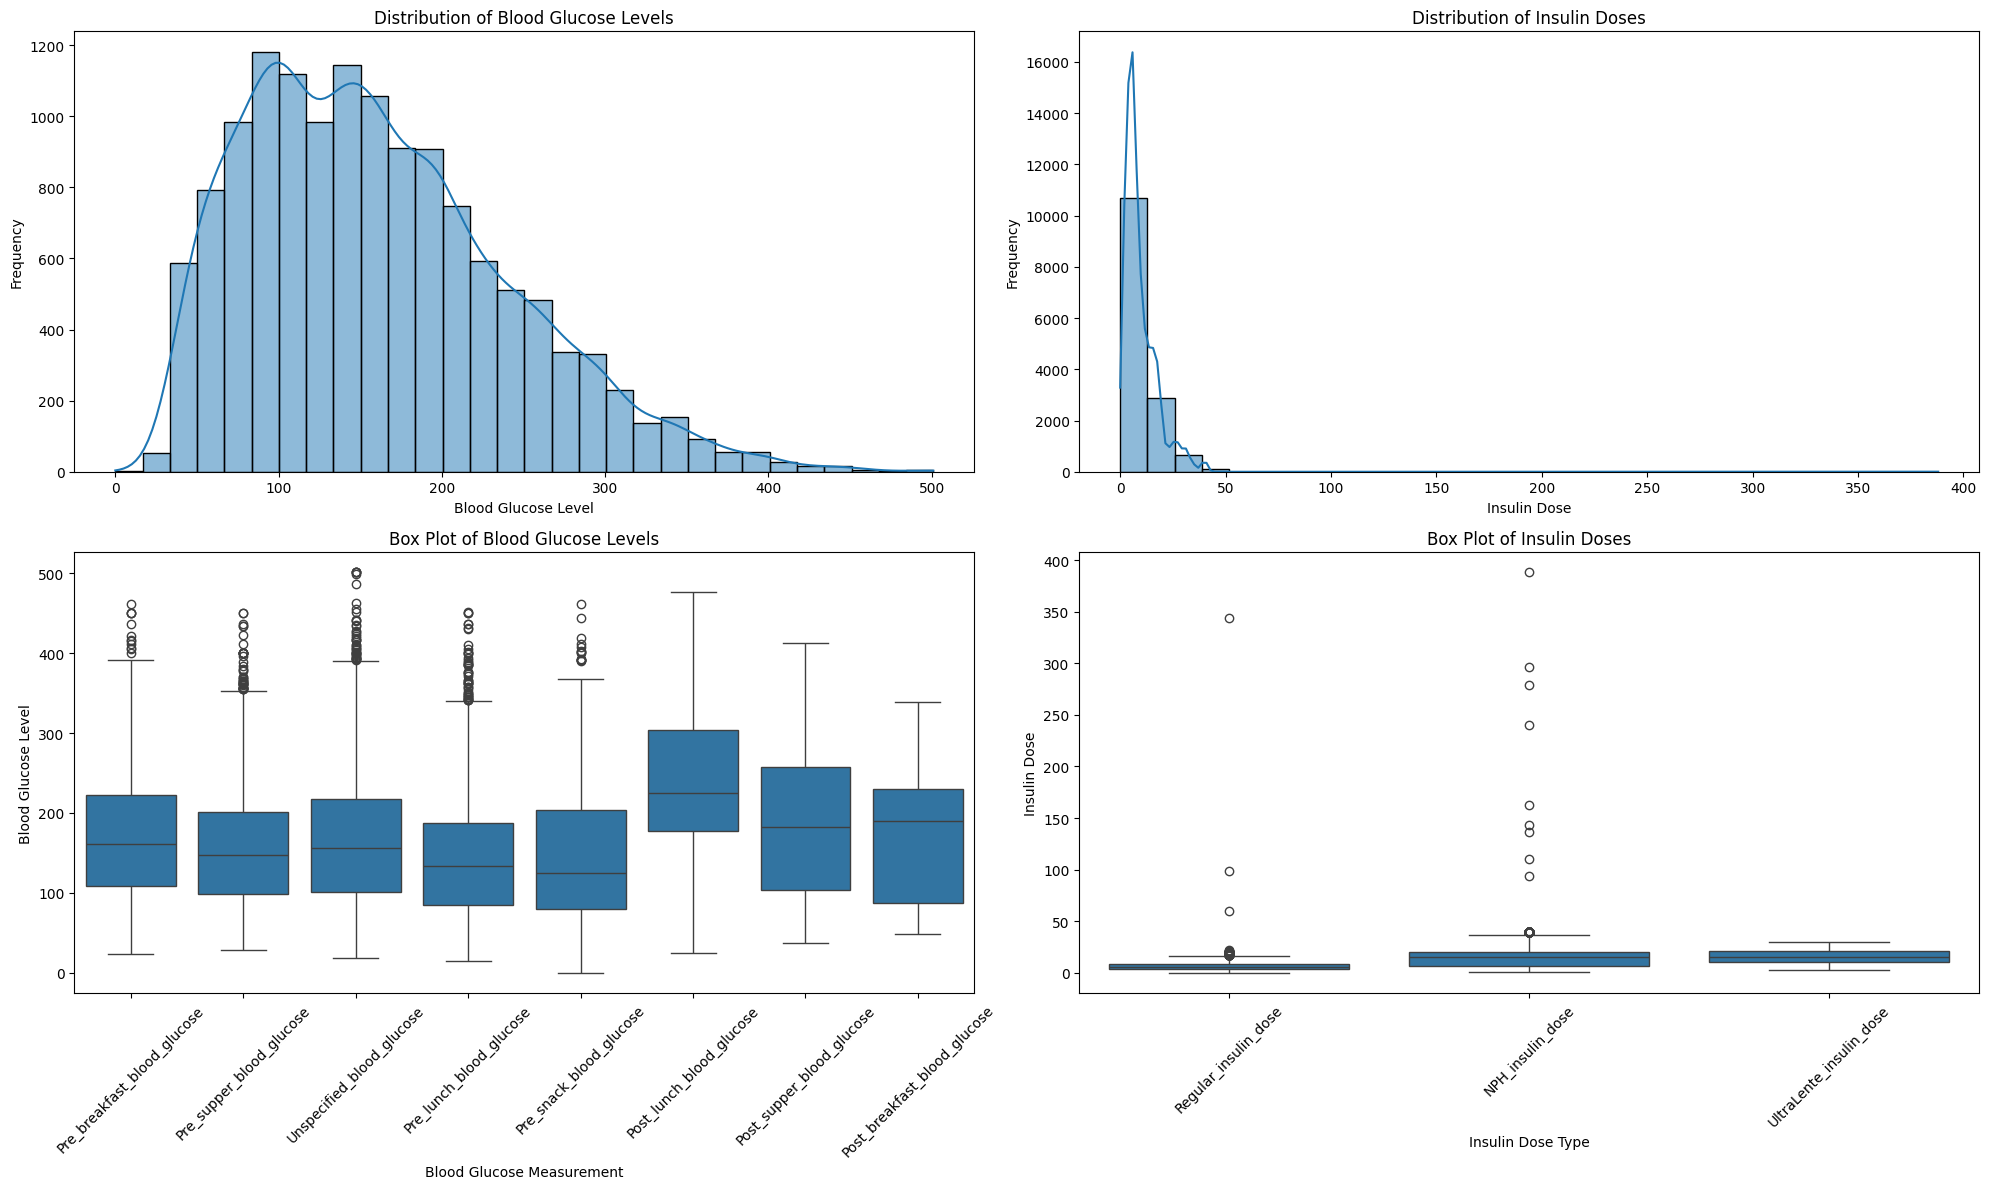

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Distribution of blood glucose levels
sns.histplot(blood_glucose_data['value'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Blood Glucose Levels')
axes[0, 0].set_xlabel('Blood Glucose Level')
axes[0, 0].set_ylabel('Frequency')

# Distribution of insulin doses
sns.histplot(insulin_data['value'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Insulin Doses')
axes[0, 1].set_xlabel('Insulin Dose')
axes[0, 1].set_ylabel('Frequency')

# Box plot for blood glucose levels
sns.boxplot(x='code_name', y='value', data=blood_glucose_data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Blood Glucose Levels')
axes[1, 0].set_xlabel('Blood Glucose Measurement')
axes[1, 0].set_ylabel('Blood Glucose Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot for insulin doses
sns.boxplot(x='code_name', y='value', data=insulin_data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Insulin Doses')
axes[1, 1].set_xlabel('Insulin Dose Type')
axes[1, 1].set_ylabel('Insulin Dose')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Outlier removal

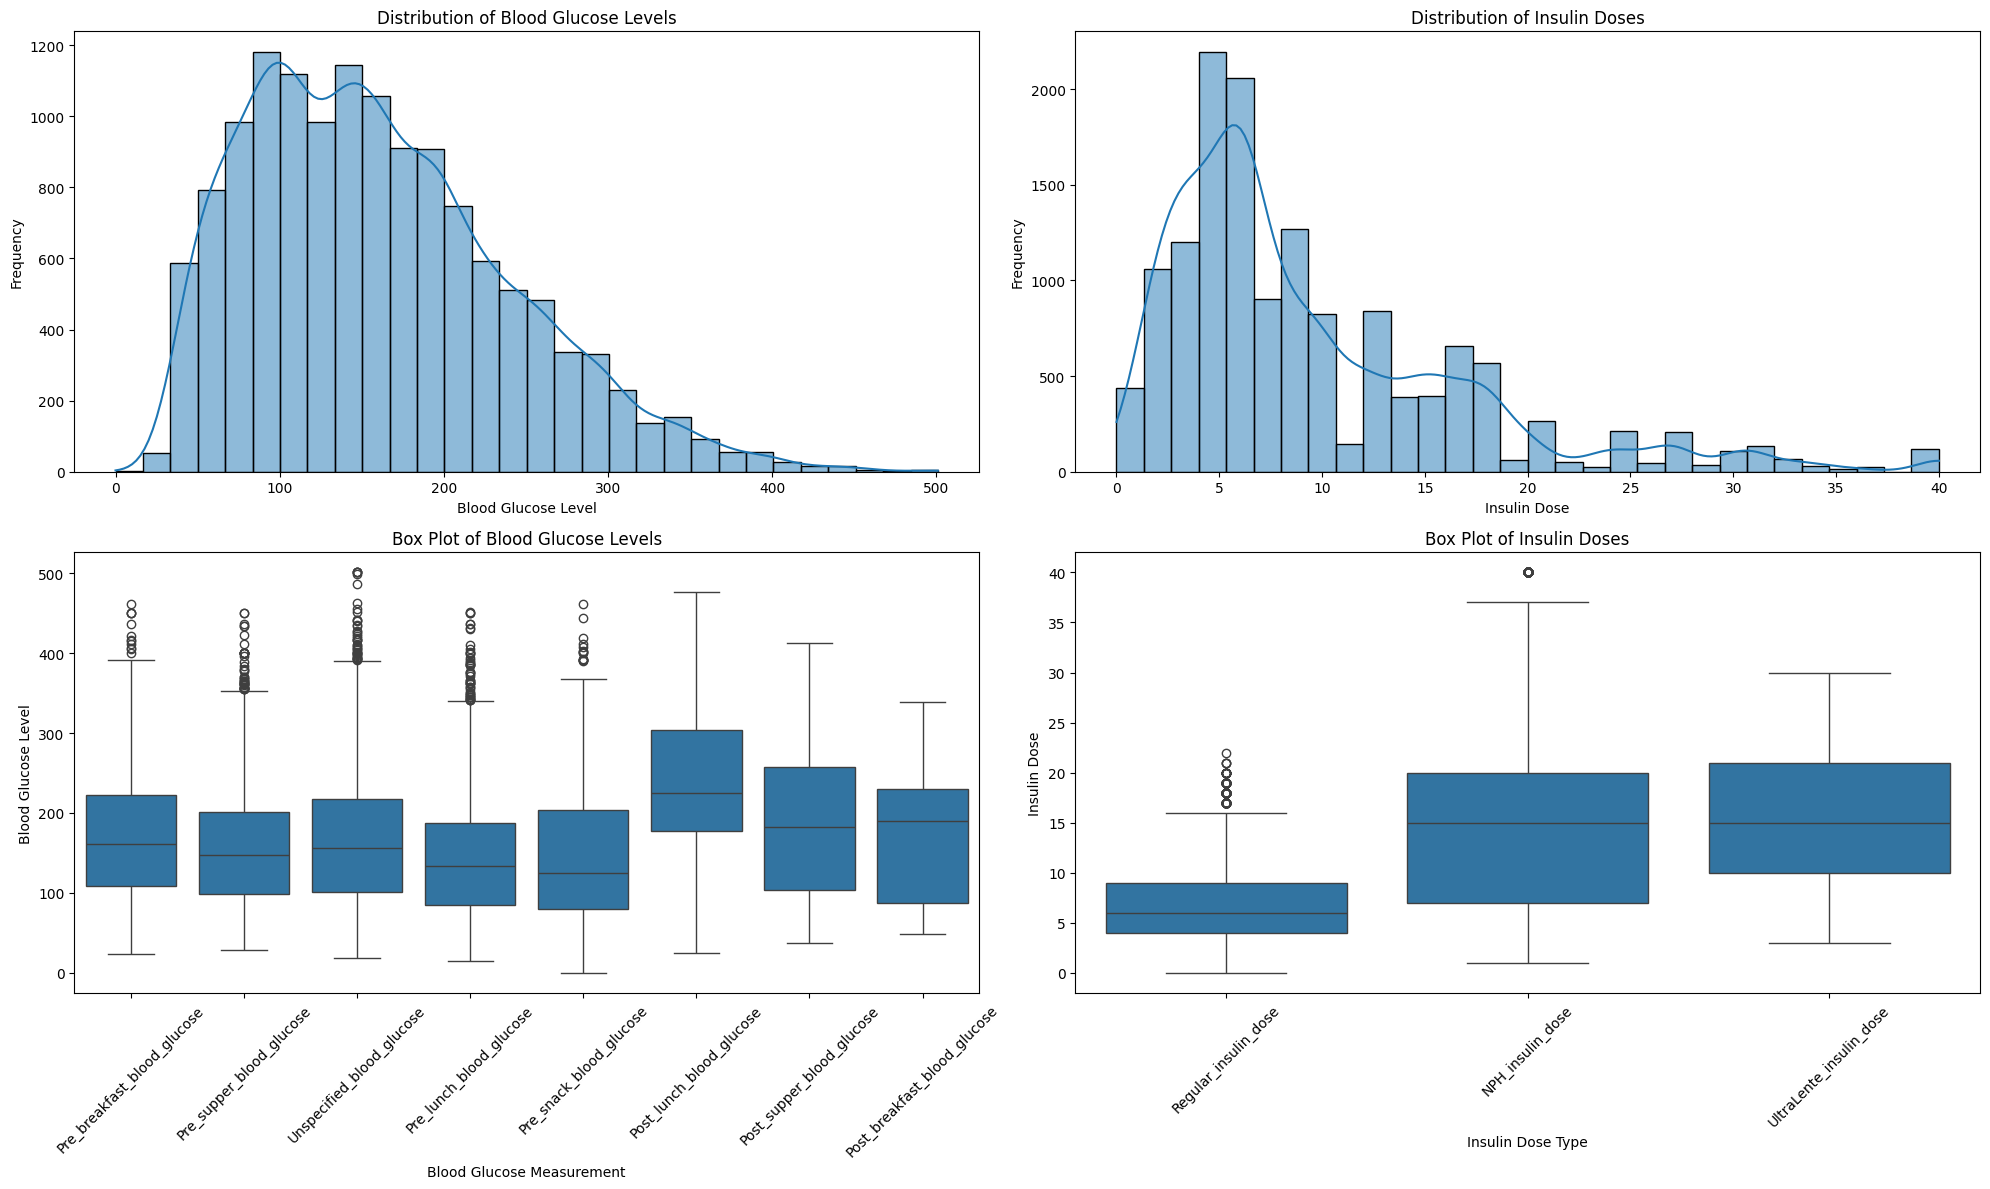

In [ ]:
# Define a function to remove outliers using a modified IQR method
def remove_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from blood glucose and insulin data with a larger multiplier
clean_blood_glucose_data = remove_outliers(blood_glucose_data, 'value', multiplier=3)
clean_insulin_data = remove_outliers(insulin_data, 'value', multiplier=3)


import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Distribution of blood glucose levels
sns.histplot(clean_blood_glucose_data['value'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Blood Glucose Levels')
axes[0, 0].set_xlabel('Blood Glucose Level')
axes[0, 0].set_ylabel('Frequency')

# Distribution of insulin doses
sns.histplot(clean_insulin_data['value'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Insulin Doses')
axes[0, 1].set_xlabel('Insulin Dose')
axes[0, 1].set_ylabel('Frequency')

# Box plot for blood glucose levels
sns.boxplot(x='code_name', y='value', data=clean_blood_glucose_data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Blood Glucose Levels')
axes[1, 0].set_xlabel('Blood Glucose Measurement')
axes[1, 0].set_ylabel('Blood Glucose Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot for insulin doses
sns.boxplot(x='code_name', y='value', data=clean_insulin_data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Insulin Doses')
axes[1, 1].set_xlabel('Insulin Dose Type')
axes[1, 1].set_ylabel('Insulin Dose')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Historam of blood glucose levels for each category

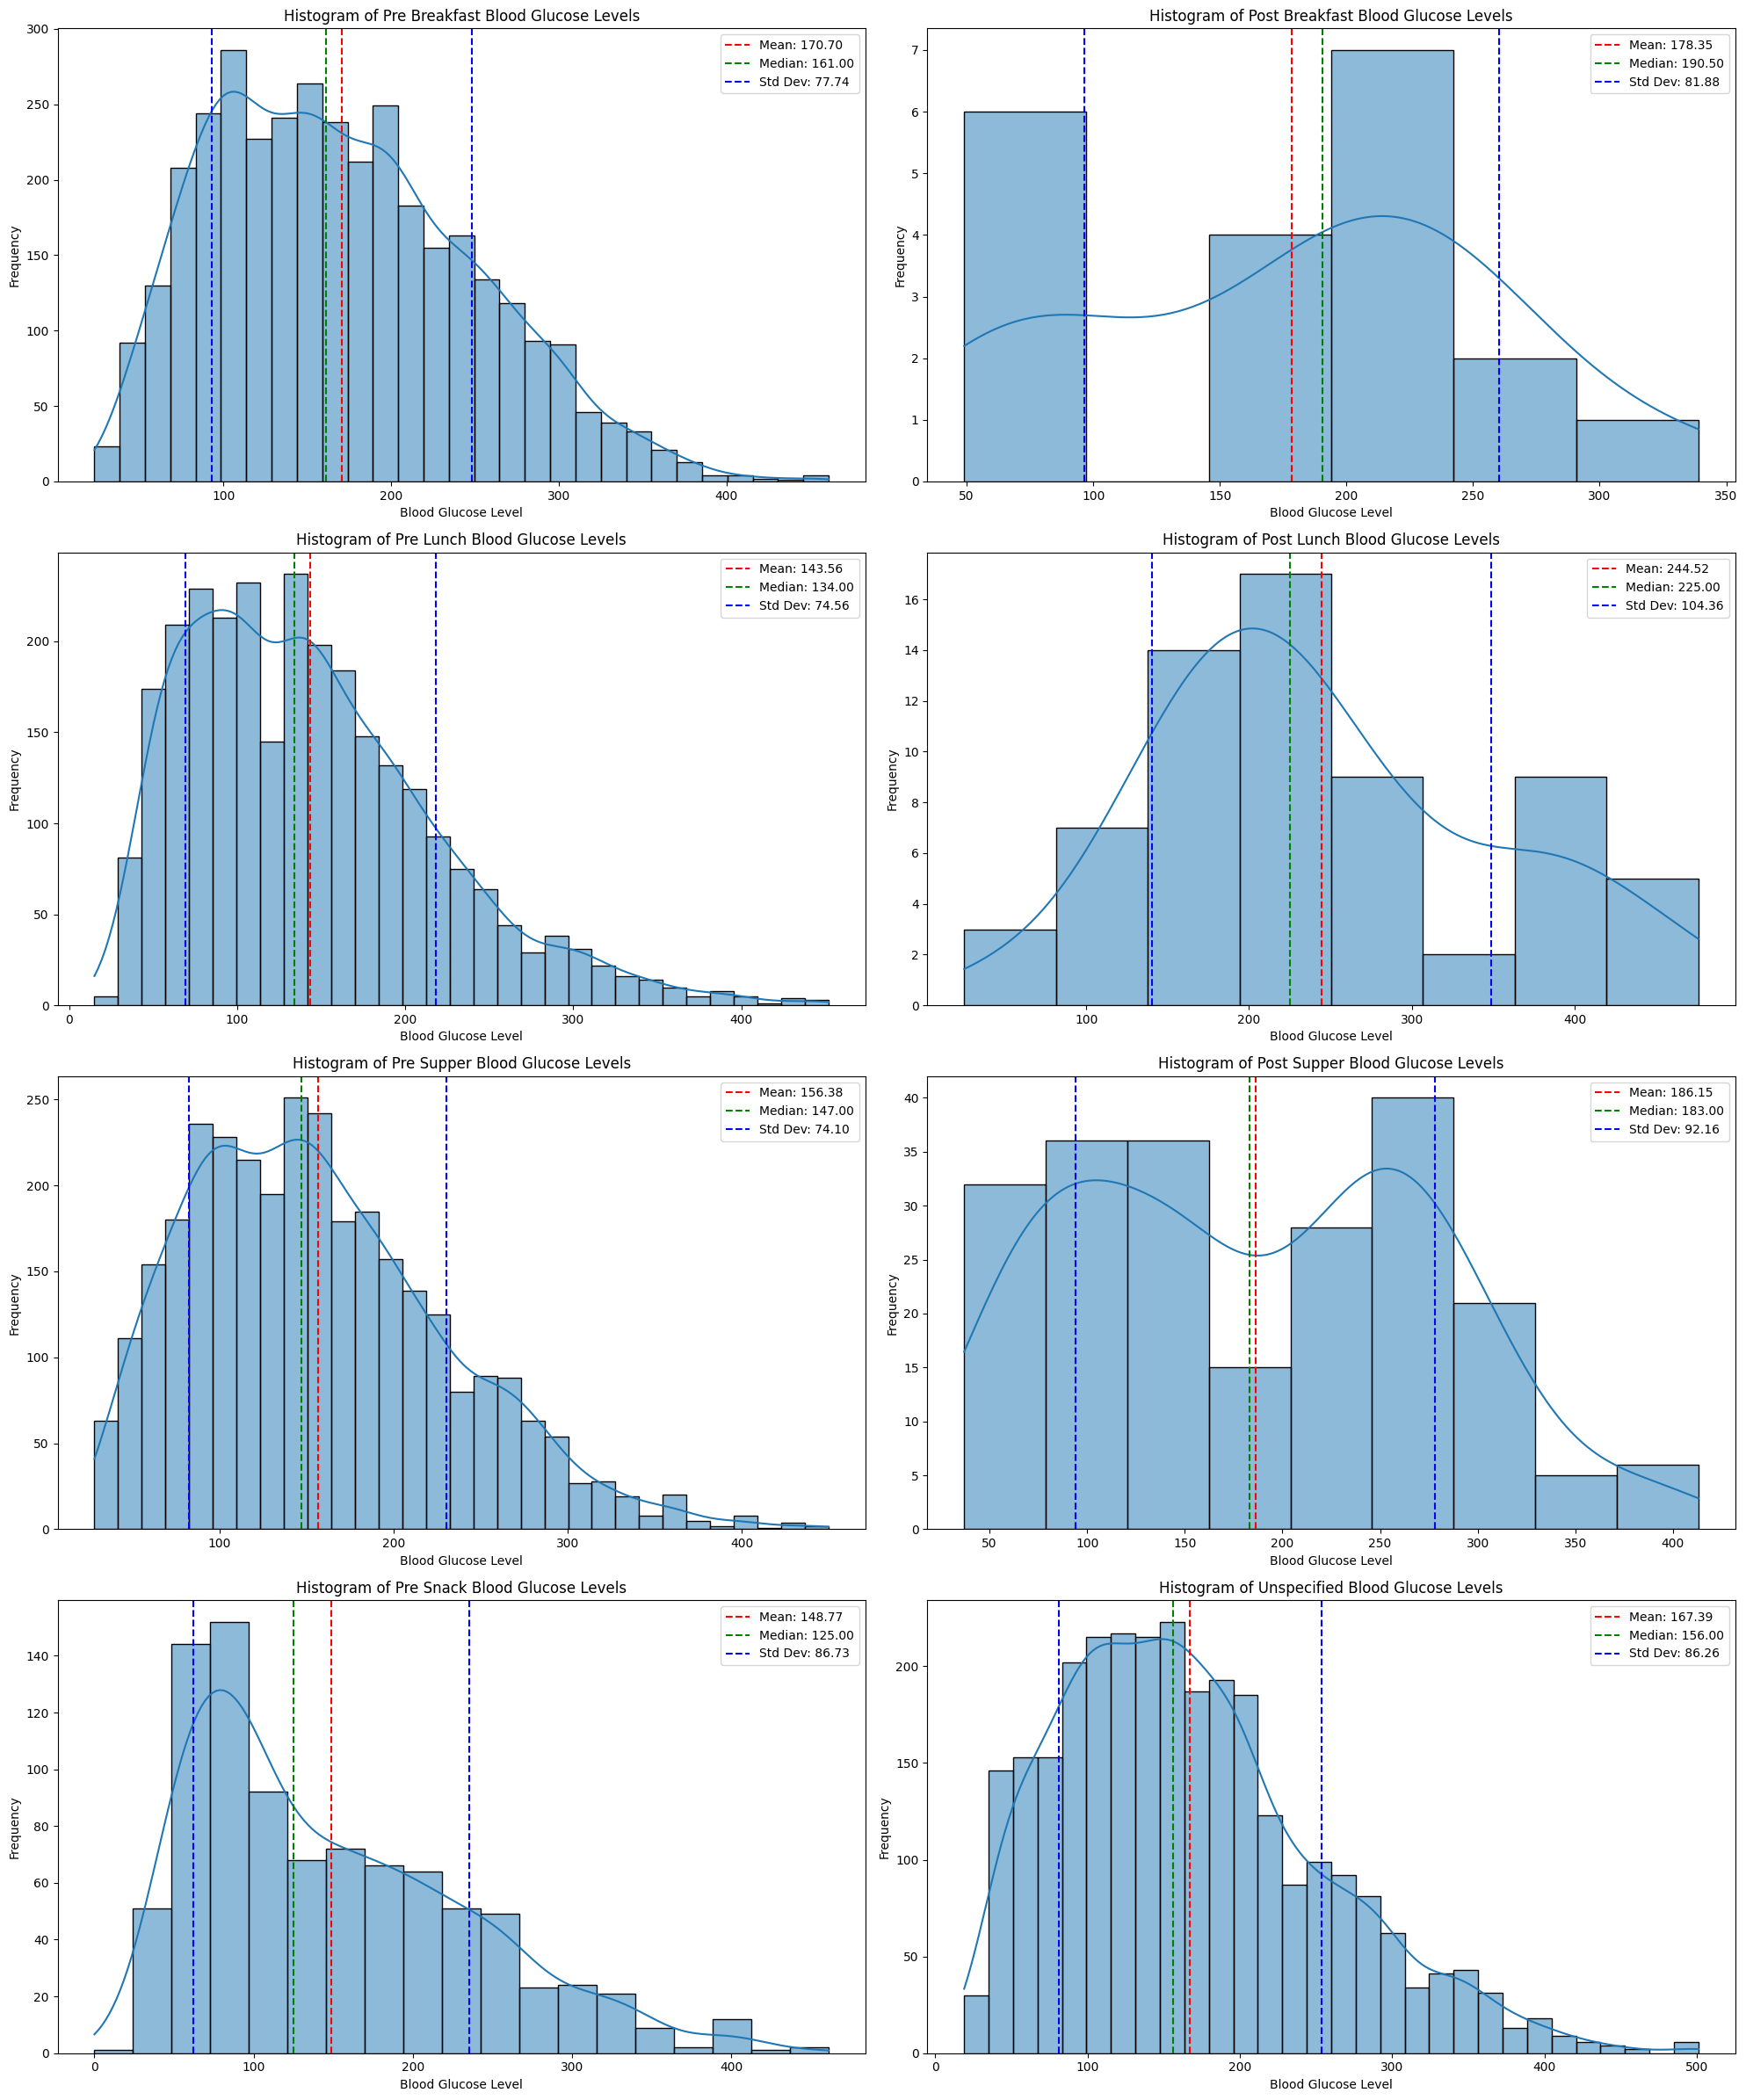

In [ ]:
# Plot the distribution of each blood glucose field in subplots using histograms and include statistics

fig, axes = plt.subplots(4, 2, figsize=(20, 24))

# Function to plot histogram with statistics
def plot_histogram_with_stats(ax, data, title, xlabel):
    mean_val = data['value'].mean()
    median_val = data['value'].median()
    std_val = data['value'].std()
    sns.histplot(ax=ax, data=data, x='value', kde=True)
    ax.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    ax.axvline(mean_val + std_val, color='b', linestyle='--', label=f'Std Dev: {std_val:.2f}')
    ax.axvline(mean_val - std_val, color='b', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.legend()

# Pre Breakfast Blood Glucose Levels
plot_histogram_with_stats(
    axes[0, 0],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Pre_breakfast_blood_glucose'],
    'Histogram of Pre Breakfast Blood Glucose Levels',
    'Blood Glucose Level'
)

# Post Breakfast Blood Glucose Levels
plot_histogram_with_stats(
    axes[0, 1],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Post_breakfast_blood_glucose'],
    'Histogram of Post Breakfast Blood Glucose Levels',
    'Blood Glucose Level'
)

# Pre Lunch Blood Glucose Levels
plot_histogram_with_stats(
    axes[1, 0],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Pre_lunch_blood_glucose'],
    'Histogram of Pre Lunch Blood Glucose Levels',
    'Blood Glucose Level'
)

# Post Lunch Blood Glucose Levels
plot_histogram_with_stats(
    axes[1, 1],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Post_lunch_blood_glucose'],
    'Histogram of Post Lunch Blood Glucose Levels',
    'Blood Glucose Level'
)

# Pre Supper Blood Glucose Levels
plot_histogram_with_stats(
    axes[2, 0],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Pre_supper_blood_glucose'],
    'Histogram of Pre Supper Blood Glucose Levels',
    'Blood Glucose Level'
)

# Post Supper Blood Glucose Levels
plot_histogram_with_stats(
    axes[2, 1],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Post_supper_blood_glucose'],
    'Histogram of Post Supper Blood Glucose Levels',
    'Blood Glucose Level'
)

# Pre Snack Blood Glucose Levels
plot_histogram_with_stats(
    axes[3, 0],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Pre_snack_blood_glucose'],
    'Histogram of Pre Snack Blood Glucose Levels',
    'Blood Glucose Level'
)

# Unspecified Blood Glucose Levels
plot_histogram_with_stats(
    axes[3, 1],
    clean_blood_glucose_data[clean_blood_glucose_data['code_name'] == 'Unspecified_blood_glucose'],
    'Histogram of Unspecified Blood Glucose Levels',
    'Blood Glucose Level'
)

plt.tight_layout()
plt.show()



## Trend Analysis

<ipython-input-172-bbe2b82d5f43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_blood_glucose_data['time'] = pd.to_datetime(clean_blood_glucose_data['time'], format='%I:%M:%S %p')
<ipython-input-172-bbe2b82d5f43>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_blood_glucose_data['minute'] = clean_blood_glucose_data['time'].dt.floor('T')
<ipython-input-172-bbe2b82d5f43>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

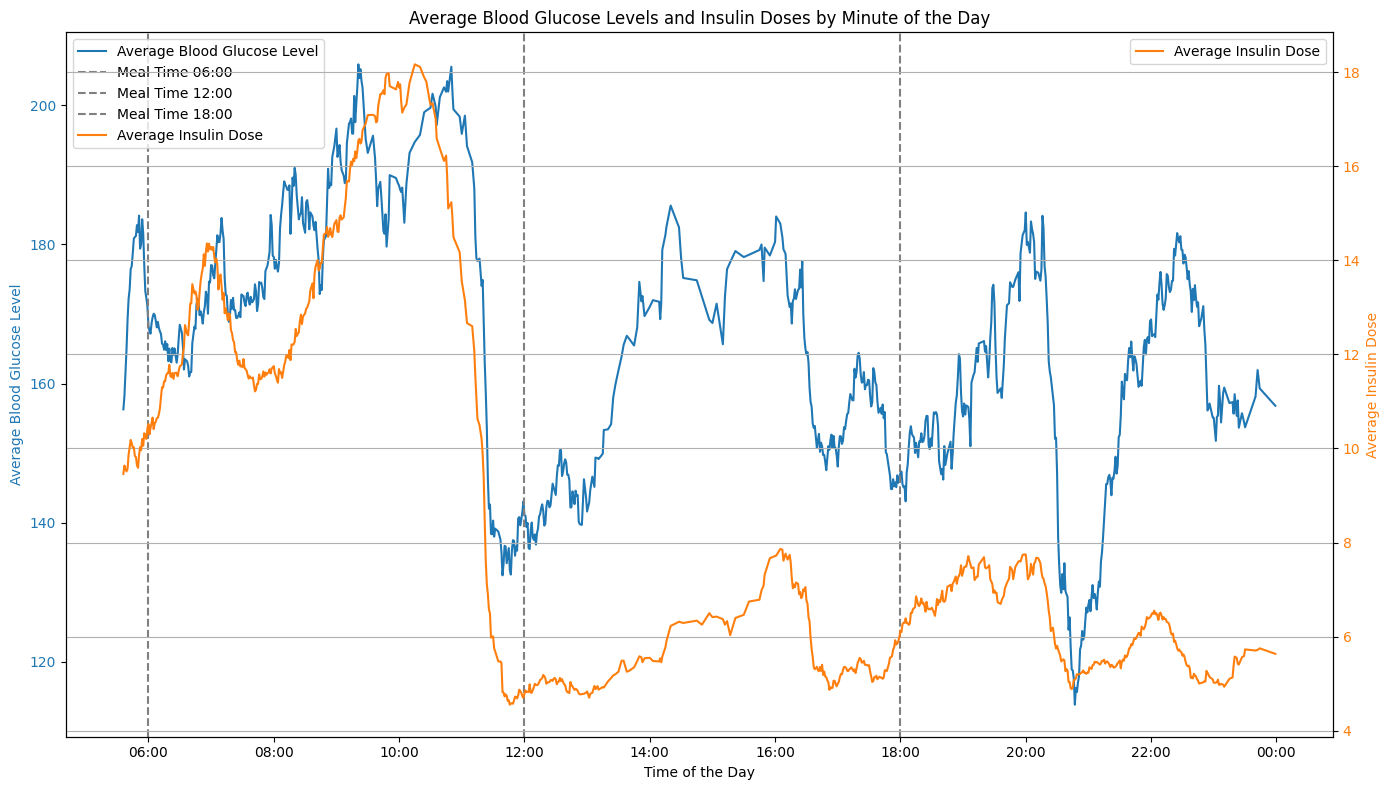

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Convert 'time' to datetime and extract minute
clean_blood_glucose_data['time'] = pd.to_datetime(clean_blood_glucose_data['time'], format='%I:%M:%S %p')
clean_blood_glucose_data['minute'] = clean_blood_glucose_data['time'].dt.floor('T')

clean_insulin_data['time'] = pd.to_datetime(clean_insulin_data['time'], format='%I:%M:%S %p')
clean_insulin_data['minute'] = clean_insulin_data['time'].dt.floor('T')

# Group by minute and calculate the average for blood glucose
avg_glucose_by_minute = clean_blood_glucose_data.groupby(['minute'])['value'].mean().reset_index()
avg_glucose_by_minute.rename(columns={'value': 'avg_blood_glucose'}, inplace=True)

# Group by minute and calculate the average for insulin
avg_insulin_by_minute = clean_insulin_data.groupby(['minute'])['value'].mean().reset_index()
avg_insulin_by_minute.rename(columns={'value': 'avg_insulin_dose'}, inplace=True)

# Merge the two dataframes on the minute
avg_data_by_minute = pd.merge(avg_glucose_by_minute, avg_insulin_by_minute, on='minute')

# Smooth the data using rolling mean with a larger window
avg_data_by_minute['avg_blood_glucose_smooth'] = avg_data_by_minute['avg_blood_glucose'].rolling(window=30).mean()
avg_data_by_minute['avg_insulin_dose_smooth'] = avg_data_by_minute['avg_insulin_dose'].rolling(window=30).mean()

# Plot trends for both blood glucose and insulin by minute of the day with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting blood glucose levels
color = 'tab:blue'
ax1.set_xlabel('Time of the Day')
ax1.set_ylabel('Average Blood Glucose Level', color=color)
sns.lineplot(data=avg_data_by_minute, x='minute', y='avg_blood_glucose_smooth', ax=ax1, color=color, label='Average Blood Glucose Level')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to share the same x-axis
ax2 = ax1.twinx()

# Plotting insulin doses
color = 'tab:orange'
ax2.set_ylabel('Average Insulin Dose', color=color)
sns.lineplot(data=avg_data_by_minute, x='minute', y='avg_insulin_dose_smooth', ax=ax2, color=color, label='Average Insulin Dose')
ax2.tick_params(axis='y', labelcolor=color)

# Format x-axis to show time
time_fmt = DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(time_fmt)

# Add vertical lines for standard meal times
meal_times = ['06:00', '12:00', '18:00']
for meal_time in meal_times:
    meal_time_dt = pd.to_datetime(meal_time, format='%H:%M')
    ax1.axvline(meal_time_dt, color='grey', linestyle='--', label=f'Meal Time {meal_time_dt.strftime("%H:%M")}')

# Add a title and show the plot
plt.title('Average Blood Glucose Levels and Insulin Doses by Minute of the Day')
fig.tight_layout()  # to ensure the right y-label is not slightly clipped

# Combine legends and ensure they don't overlap
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.grid(True)
plt.show()


## Pair Plot

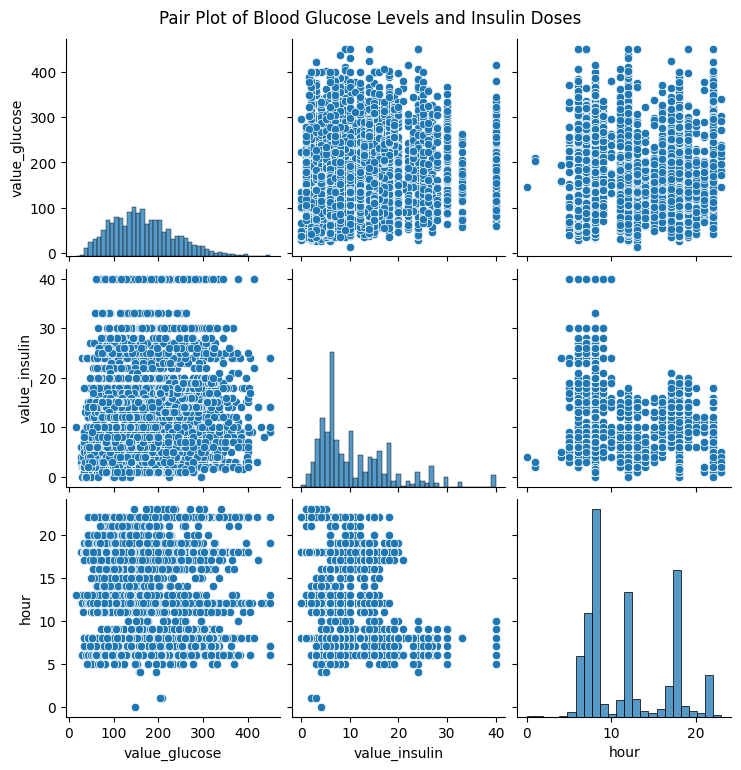

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Pair plot of blood glucose levels and insulin doses
sns.pairplot(merged_data, vars=['value_glucose', 'value_insulin', 'hour'])
plt.suptitle('Pair Plot of Blood Glucose Levels and Insulin Doses', y=1.02)
plt.show()



## Identify Correlations

Correlation Matrix:
                value_glucose  value_insulin
value_glucose       1.000000       0.170256
value_insulin       0.170256       1.000000


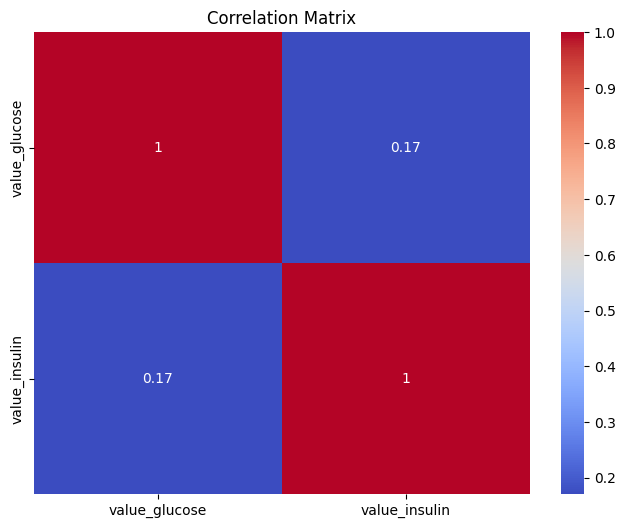

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Merge blood glucose and insulin data for correlation analysis
merged_data = pd.merge(clean_blood_glucose_data, clean_insulin_data, on=['date', 'time', 'patient_id'], suffixes=('_glucose', '_insulin'))

# Feature engineering: Create features for regression modeling
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['day_of_week'] = merged_data['date'].dt.dayofweek
merged_data['hour'] = pd.to_datetime(merged_data['time'], format='%I:%M:%S %p').dt.hour

# Correlation matrix
correlation_matrix = merged_data[['value_glucose', 'value_insulin']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Correlation Matrix for Pre_breakfast_blood_glucose and Regular_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000       0.371417
value_insulin       0.371417       1.000000


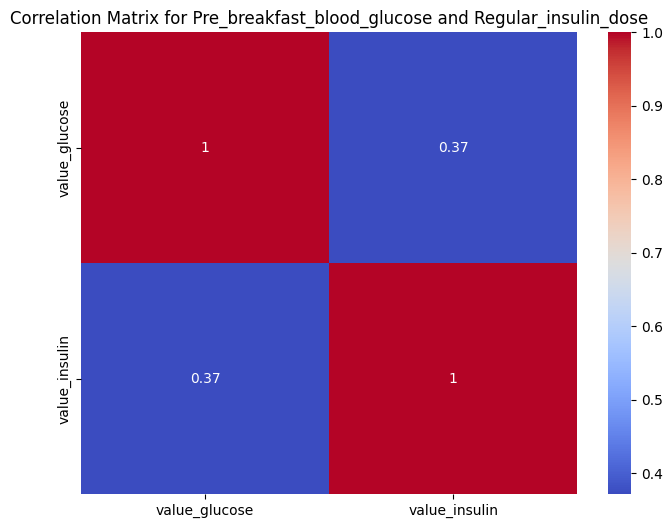

Correlation Matrix for Pre_breakfast_blood_glucose and NPH_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000       0.157109
value_insulin       0.157109       1.000000


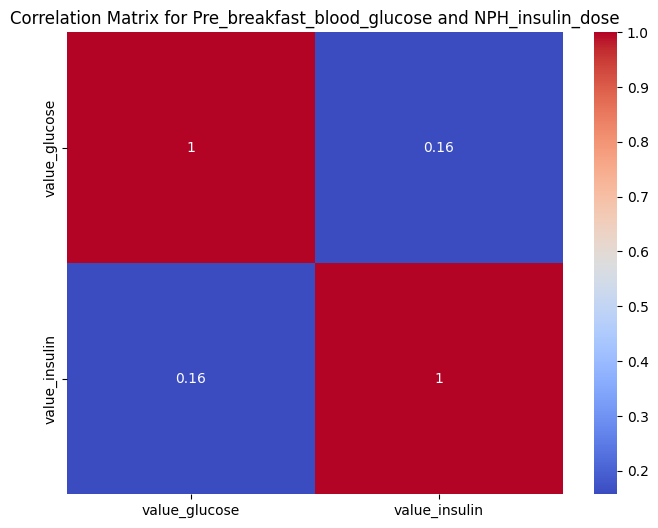

Correlation Matrix for Pre_breakfast_blood_glucose and UltraLente_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000       0.189848
value_insulin       0.189848       1.000000


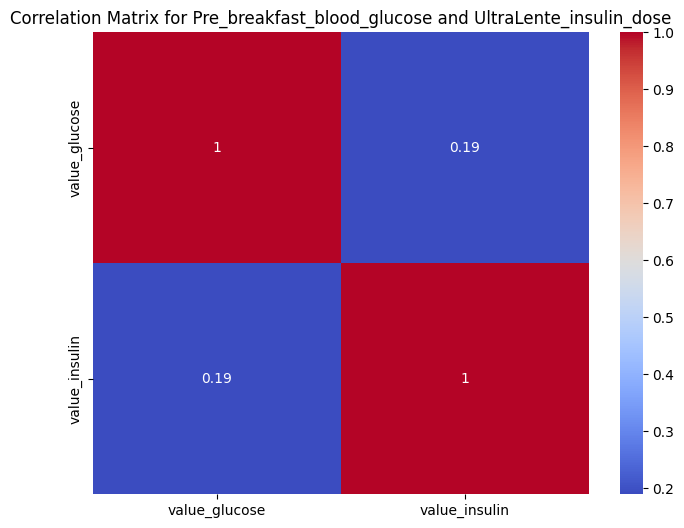

Correlation Matrix for Pre_lunch_blood_glucose and Regular_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000       0.357385
value_insulin       0.357385       1.000000


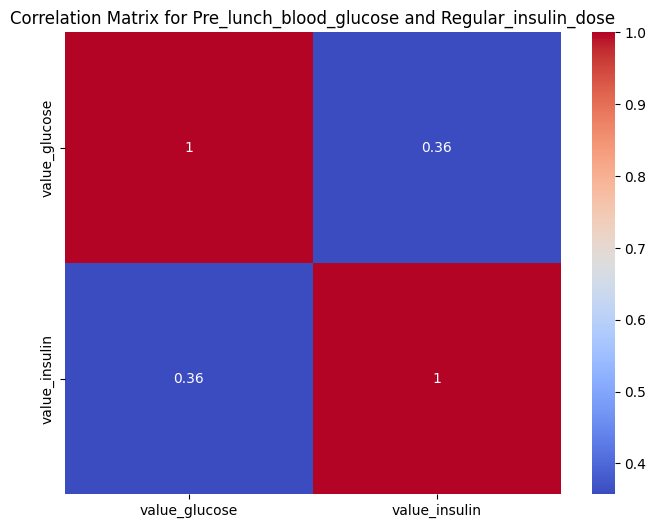

Correlation Matrix for Pre_lunch_blood_glucose and NPH_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000      -0.948167
value_insulin      -0.948167       1.000000


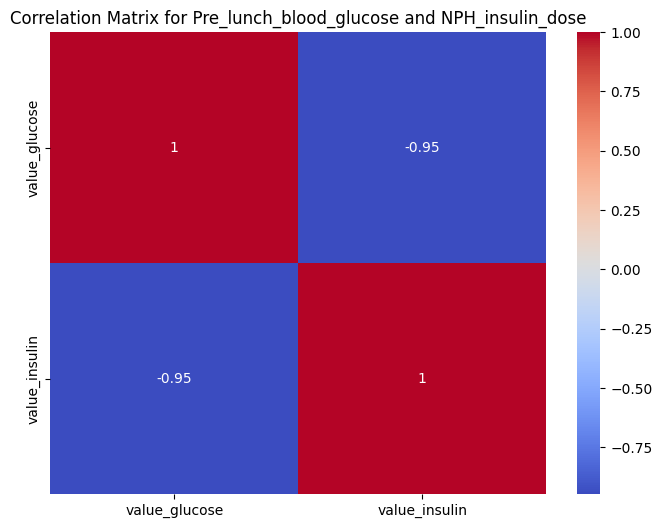

Correlation Matrix for Pre_supper_blood_glucose and Regular_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000       0.259926
value_insulin       0.259926       1.000000


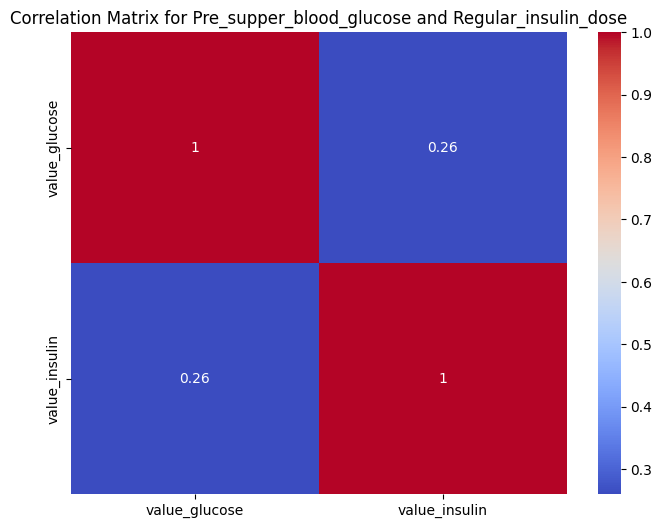

Correlation Matrix for Pre_supper_blood_glucose and NPH_insulin_dose:
                value_glucose  value_insulin
value_glucose       1.000000      -0.385693
value_insulin      -0.385693       1.000000


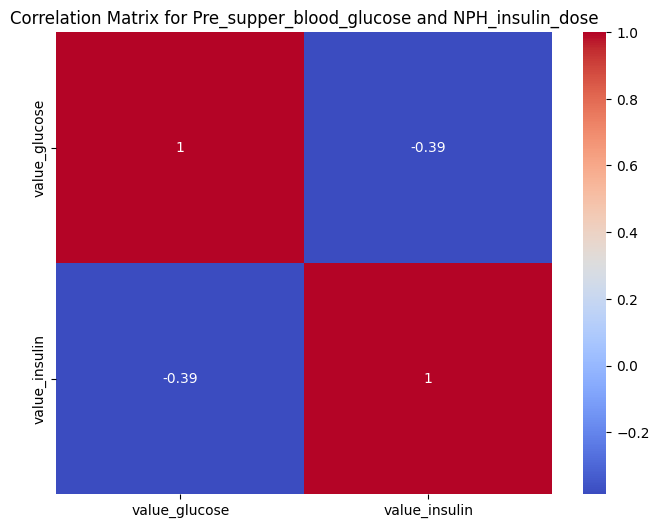

Correlation Matrix for Pre_supper_blood_glucose and UltraLente_insulin_dose:
                value_glucose  value_insulin
value_glucose            NaN            NaN
value_insulin            NaN            NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


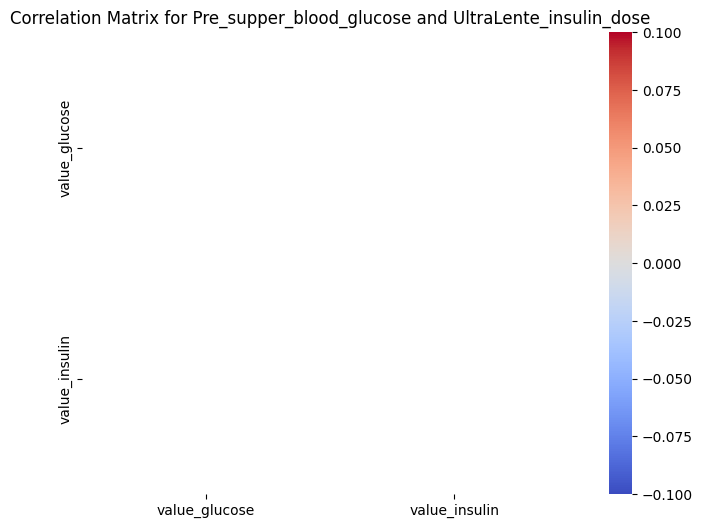

In [ ]:
# Create subsets of blood glucose data
glucose_subsets = {
    'Pre_breakfast_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Pre_breakfast_blood_glucose'],
    'Post_breakfast_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Post_breakfast_blood_glucose'],
    'Pre_lunch_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Pre_lunch_blood_glucose'],
    'Post_lunch_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Post_lunch_blood_glucose'],
    'Pre_supper_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Pre_supper_blood_glucose'],
    'Post_supper_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Post_supper_blood_glucose'],
    'Pre_snack_blood_glucose': diabetes_data[diabetes_data['code_name'] == 'Pre_snack_blood_glucose']
}

# Create subsets of insulin data
insulin_subsets = {
    'Regular_insulin_dose': diabetes_data[diabetes_data['code_name'] == 'Regular_insulin_dose'],
    'NPH_insulin_dose': diabetes_data[diabetes_data['code_name'] == 'NPH_insulin_dose'],
    'UltraLente_insulin_dose': diabetes_data[diabetes_data['code_name'] == 'UltraLente_insulin_dose']
}

# Function to calculate and plot correlation matrix
def plot_correlation_matrix(merged_data, title):
    correlation_matrix = merged_data[['value_glucose', 'value_insulin']].corr()
    print(f"Correlation Matrix for {title}:\n", correlation_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {title}')
    plt.show()

# Iterate over each combination of glucose and insulin subsets
for glucose_name, glucose_data in glucose_subsets.items():
    for insulin_name, insulin_data in insulin_subsets.items():
        # Merge glucose and insulin data for correlation analysis
        merged_data = pd.merge(glucose_data, insulin_data, on=['date', 'time', 'patient_id'], suffixes=('_glucose', '_insulin'))

        # Check if merged_data is not empty
        if not merged_data.empty:
            plot_title = f'{glucose_name} and {insulin_name}'
            plot_correlation_matrix(merged_data, plot_title)

# Regression

## Data Preporocessing

In [ ]:
# Create lag features
for lag in range(1, 4):
    merged_data[f'lag{lag}_glucose'] = merged_data['value_glucose'].shift(lag)
    merged_data[f'lag{lag}_insulin'] = merged_data['value_insulin'].shift(lag)

# Drop rows with NaN values created by shift
merged_data.dropna(inplace=True)

# Feature engineering: Create features for regression modeling
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['day_of_week'] = merged_data['date'].dt.dayofweek
merged_data['hour'] = pd.to_datetime(merged_data['time'], format='%I:%M:%S %p').dt.hour

# Select relevant features and target
features = merged_data[['day_of_week', 'hour', 'lag1_glucose', 'lag2_glucose', 'lag3_glucose', 'lag1_insulin', 'lag2_insulin', 'lag3_insulin']]
target = merged_data['value_glucose']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## Linear Regression

Mean Squared Error: 4148.980263981686
R-squared: 0.20495897136852015


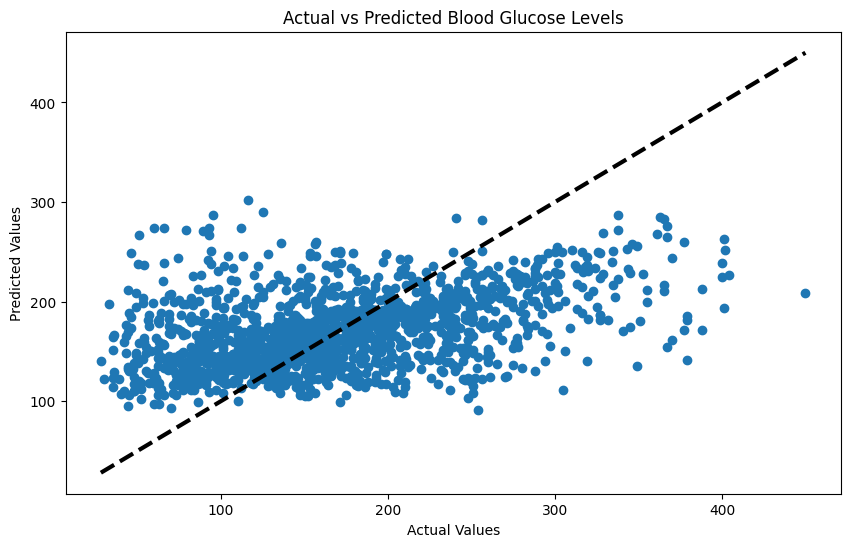

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Random Forest Regressor

Random Forest - Mean Squared Error: 3605.708928181818
Random Forest - R-squared: 0.30906238332975666


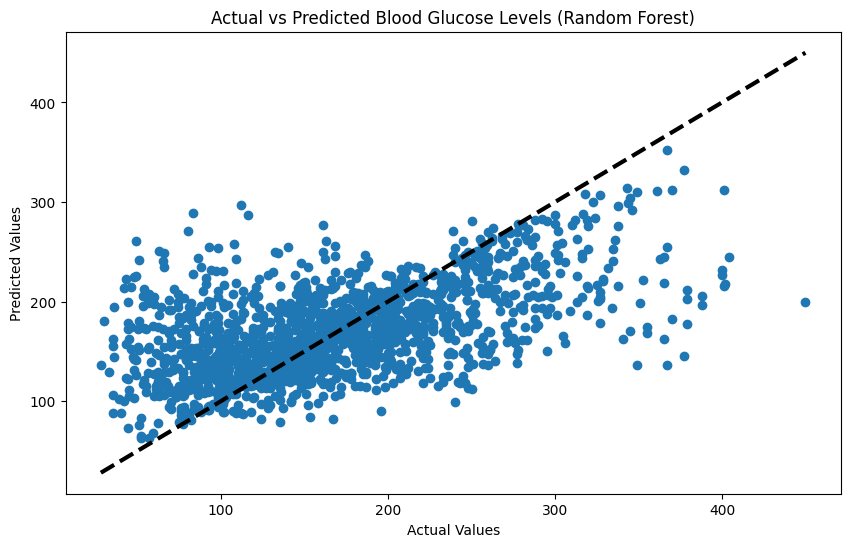

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Gradient Boosting Regressor

Gradient Boosting - Mean Squared Error: 3718.8406108505037
Gradient Boosting - R-squared: 0.28738372408412205


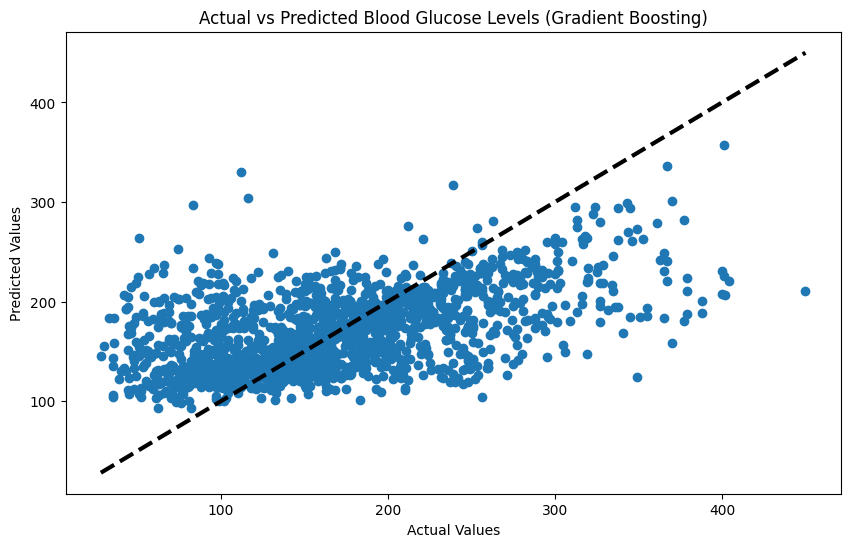

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a gradient boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Support Vector Regressor (SVR)

SVR - Mean Squared Error: 3869.8675441760706
SVR - R-squared: 0.25844345423887927


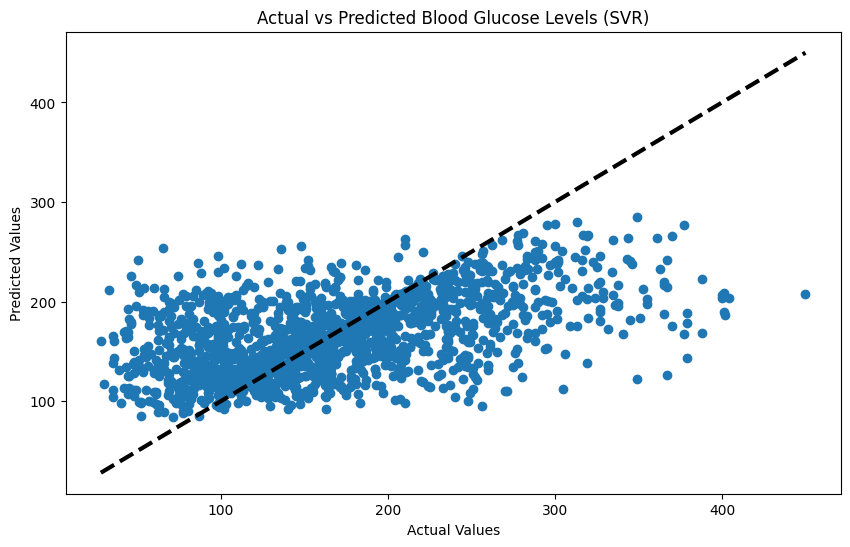

In [ ]:
from sklearn.svm import SVR

# Train an SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Neural Network Regressor

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - Mean Squared Error: 3631.7447957784007
Neural Network - R-squared: 0.30407330610155237


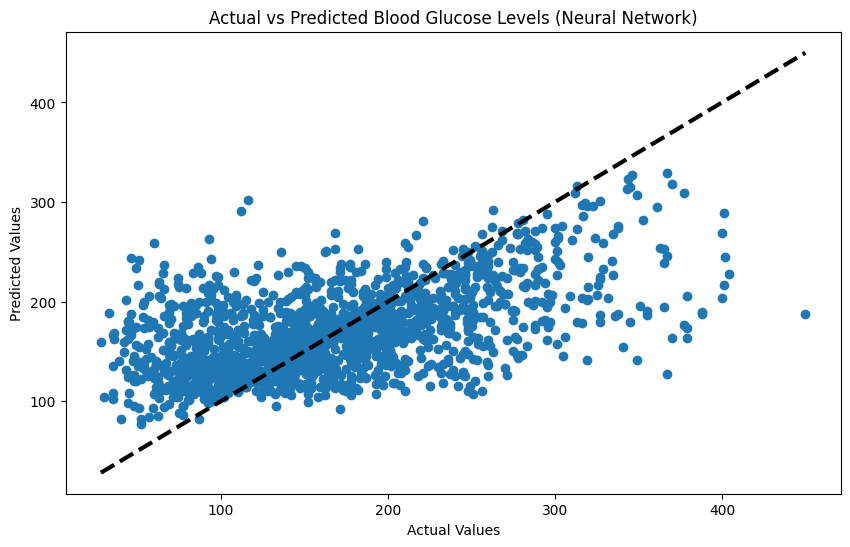

In [ ]:
from sklearn.neural_network import MLPRegressor

# Train a neural network model
nn_model = MLPRegressor(random_state=42, max_iter=1000)
nn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network - Mean Squared Error: {mse_nn}")
print(f"Neural Network - R-squared: {r2_nn}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (Neural Network)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## ElasticNet

ElasticNet - Mean Squared Error: 4265.474549575127
ElasticNet - R-squared: 0.18263595926553766


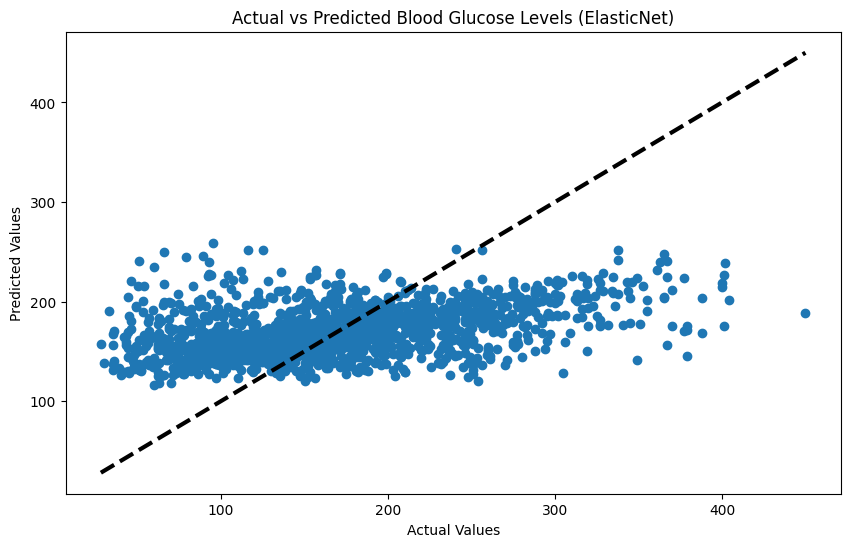

In [ ]:
from sklearn.linear_model import ElasticNet

# Train an ElasticNet model
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X_test_scaled)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"ElasticNet - Mean Squared Error: {mse_elastic}")
print(f"ElasticNet - R-squared: {r2_elastic}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (ElasticNet)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Ridge Regression

Ridge Regression - Mean Squared Error: 4148.9737618082145
Ridge Regression - R-squared: 0.20496021733604863


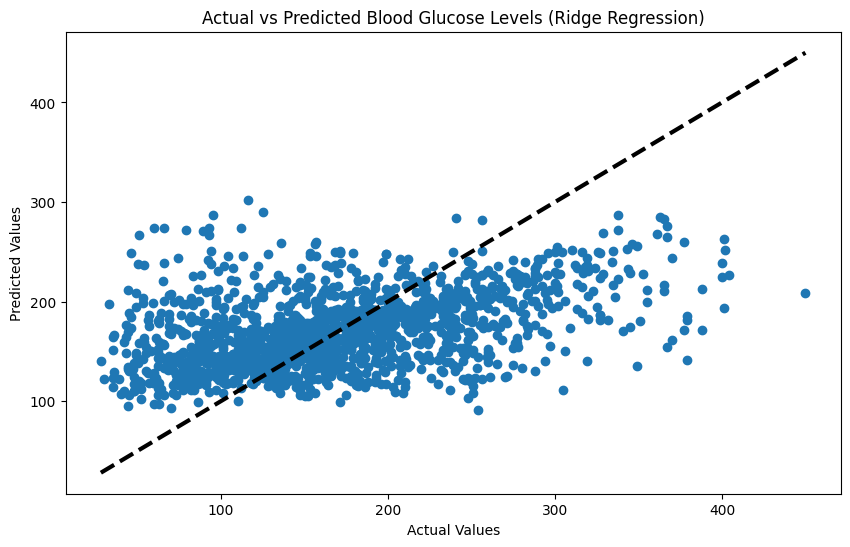

In [ ]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R-squared: {r2_ridge}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Lasso Regression

Lasso Regression - Mean Squared Error: 5410.433355770879
Lasso Regression - R-squared: 0.03235181832007239


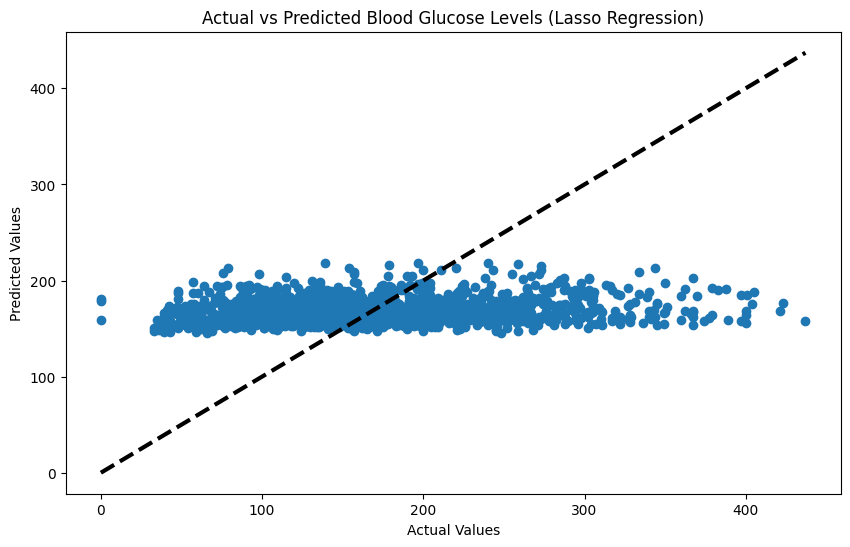

In [ ]:
from sklearn.linear_model import Lasso

# Train a Lasso regression model
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R-squared: {r2_lasso}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Blood Glucose Levels (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
